In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, DoubleType, BooleanType, DateType
import pandas as pd
#! pip install sqlalchemy
from sqlalchemy import create_engine

In [3]:
#initialize spark session
spark = SparkSession.builder \
    .appName("MyApp") \
    .getOrCreate()

In [3]:
#.config("spark.driver.memory", "8g") \

In [5]:
spark

In [7]:
# import dataset
df = spark.read.csv(r"E:\10alytics Data Engineering\week 9\material\break assignment\kumba_construction_data.csv"
    
    ,header=True
    ,inferSchema=True
)
df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----------+---------------+----------+--------------------+-----------+--------+--------------+----------------------+-------------+---------+-------------+----------+--------------+----------------+--------------------+----------------+----------------+-------------------+-----------------+------------------------+---------------------+---------------+--------------------+----+
|           ProjectID|         ProjectName|          ClientName|         ProjectType|       ProjectStatus| StartDate|   EndDate|EstimatedBudget|ActualCost|            Location|ManagerName|TeamSize|ContractorName|NumberOfSubcontractors|MaterialsCost|LaborCost|EquipmentCost|PermitFees|InspectionFees|ChangeOrderCount|SafetyIncidentsCount|ProjectDelayDays|WeatherDelayDays|ClientFeedbackScore|QualityAuditScore|EnvironmentalImpactScore|EnergyEfficiencyScore|InnovationScore|CommunityImpactScore| ROI|
+-

In [9]:
df.printSchema()

root
 |-- ProjectID: string (nullable = true)
 |-- ProjectName: string (nullable = true)
 |-- ClientName: string (nullable = true)
 |-- ProjectType: string (nullable = true)
 |-- ProjectStatus: string (nullable = true)
 |-- StartDate: string (nullable = true)
 |-- EndDate: string (nullable = true)
 |-- EstimatedBudget: double (nullable = true)
 |-- ActualCost: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- ManagerName: double (nullable = true)
 |-- TeamSize: double (nullable = true)
 |-- ContractorName: double (nullable = true)
 |-- NumberOfSubcontractors: double (nullable = true)
 |-- MaterialsCost: double (nullable = true)
 |-- LaborCost: double (nullable = true)
 |-- EquipmentCost: double (nullable = true)
 |-- PermitFees: double (nullable = true)
 |-- InspectionFees: double (nullable = true)
 |-- ChangeOrderCount: double (nullable = true)
 |-- SafetyIncidentsCount: double (nullable = true)
 |-- ProjectDelayDays: double (nullable = true)
 |-- WeatherDelayDays:

### Data Cleaning

In [11]:
# check for null values
for i in df.columns:
    nulls = df.filter(df[i].isNull()).count()
    print(f'Null values in {i} = {nulls}')

Null values in ProjectID = 0
Null values in ProjectName = 0
Null values in ClientName = 0
Null values in ProjectType = 0
Null values in ProjectStatus = 0
Null values in StartDate = 11802
Null values in EndDate = 109710
Null values in EstimatedBudget = 110028
Null values in ActualCost = 110110
Null values in Location = 110022
Null values in ManagerName = 1210018
Null values in TeamSize = 1210366
Null values in ContractorName = 1209560
Null values in NumberOfSubcontractors = 1209770
Null values in MaterialsCost = 1209980
Null values in LaborCost = 1210244
Null values in EquipmentCost = 1210129
Null values in PermitFees = 1209997
Null values in InspectionFees = 1210733
Null values in ChangeOrderCount = 1209655
Null values in SafetyIncidentsCount = 1210529
Null values in ProjectDelayDays = 1316088
Null values in WeatherDelayDays = 2200000
Null values in ClientFeedbackScore = 2200000
Null values in QualityAuditScore = 2200000
Null values in EnvironmentalImpactScore = 2200000
Null values in 

In [13]:
Number_of_dataset_rows = df.count()
print('Number of rows = ',Number_of_dataset_rows)
print('number of columns = ',len(df.columns))

Number of rows =  2200000
number of columns =  30


In [15]:
#clean full empty columns
for i in df.columns:
    null_values = df.filter(df[i].isNull()).count()
    if null_values ==  Number_of_dataset_rows :
        df = df.drop(i)  #delete column from dataframe
         
print('Full empty columns are deleted')

Full empty columns are deleted


In [17]:
print('number of columns = ',len(df.columns))

number of columns =  22


In [19]:
# check for null values
for i in df.columns:
    nulls = df.filter(df[i].isNull()).count()
    print(f'Null values in {i} = {nulls}')

Null values in ProjectID = 0
Null values in ProjectName = 0
Null values in ClientName = 0
Null values in ProjectType = 0
Null values in ProjectStatus = 0
Null values in StartDate = 11802
Null values in EndDate = 109710
Null values in EstimatedBudget = 110028
Null values in ActualCost = 110110
Null values in Location = 110022
Null values in ManagerName = 1210018
Null values in TeamSize = 1210366
Null values in ContractorName = 1209560
Null values in NumberOfSubcontractors = 1209770
Null values in MaterialsCost = 1209980
Null values in LaborCost = 1210244
Null values in EquipmentCost = 1210129
Null values in PermitFees = 1209997
Null values in InspectionFees = 1210733
Null values in ChangeOrderCount = 1209655
Null values in SafetyIncidentsCount = 1210529
Null values in ProjectDelayDays = 1316088


In [21]:
# fill null values
df = df.fillna({
  'StartDate':'Unknown' ,
  'EndDate':'Unknown',
  'EstimatedBudget':0.0 ,
  'ActualCost':0.0 ,
  'Location':'Unknown',
  'ManagerName':0.0 ,
  'TeamSize':0.0 ,
  'ContractorName':0.0 ,
  'NumberOfSubcontractors':0.0 ,
  'MaterialsCost':0.0 ,
  'LaborCost':0.0 ,
  'EquipmentCost':0.0 ,
  'PermitFees':0.0 ,
  'InspectionFees':0.0 ,
  'ChangeOrderCount':0.0 ,
  'SafetyIncidentsCount':0.0 ,
  'ProjectDelayDays':0.0 
})
print('filled null values')

filled null values


In [23]:
# check for null values
for i in df.columns:
    nulls = df.filter(df[i].isNull()).count()
    print(f'Null values in {i} = {nulls}')

Null values in ProjectID = 0
Null values in ProjectName = 0
Null values in ClientName = 0
Null values in ProjectType = 0
Null values in ProjectStatus = 0
Null values in StartDate = 0
Null values in EndDate = 0
Null values in EstimatedBudget = 0
Null values in ActualCost = 0
Null values in Location = 0
Null values in ManagerName = 0
Null values in TeamSize = 0
Null values in ContractorName = 0
Null values in NumberOfSubcontractors = 0
Null values in MaterialsCost = 0
Null values in LaborCost = 0
Null values in EquipmentCost = 0
Null values in PermitFees = 0
Null values in InspectionFees = 0
Null values in ChangeOrderCount = 0
Null values in SafetyIncidentsCount = 0
Null values in ProjectDelayDays = 0


##### Data is clean and there are NO null values

### Data Transformation

In [25]:
#Drop duplicates
df = df.dropDuplicates()

In [27]:
Number_of_dataset_rows = df.count()
print('Number of rows = ',Number_of_dataset_rows)
print('number of columns = ',len(df.columns))

Number of rows =  2200000
number of columns =  22


ERD Diagrma

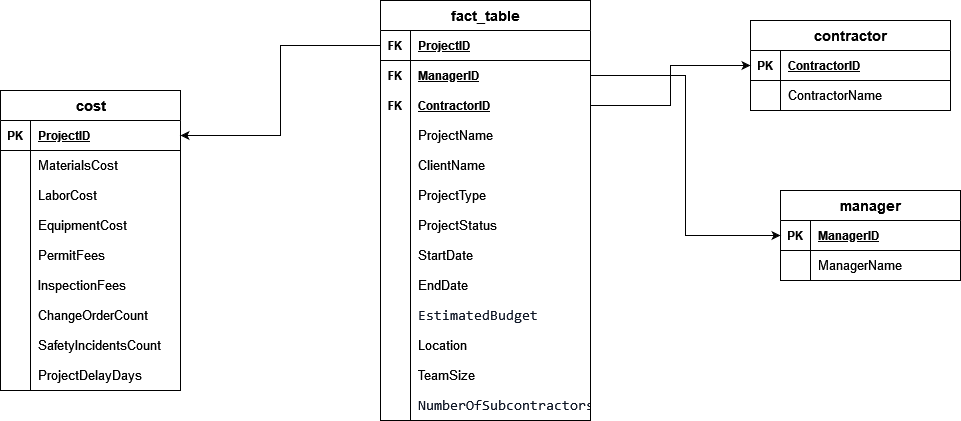

In [29]:
# import necessary functions to create unique IDs
from pyspark.sql.functions import row_number
from pyspark.sql.window import Window

In [31]:
#create table contractor

#create table
contractor = df.select('ContractorName')

#create unique ID
w = Window.orderBy('ContractorName')
contractor = contractor.withColumn('ContractorID', row_number().over(w))

#rerdering columns
contractor = contractor.select('ContractorID','ContractorName')
contractor.show(4)

+------------+--------------+
|ContractorID|ContractorName|
+------------+--------------+
|           1|           0.0|
|           2|           0.0|
|           3|           0.0|
|           4|           0.0|
+------------+--------------+
only showing top 4 rows



In [33]:
#create table manger

#create table
manager = df.select('ManagerName')

#create unique ID
w = Window.orderBy('ManagerName')
manager = manager.withColumn(('ManagerID') , row_number().over(w))

#reordering tables
manager = manager.select('ManagerID', 'ManagerName')
manager.show(5)

+---------+-----------+
|ManagerID|ManagerName|
+---------+-----------+
|        1|        0.0|
|        2|        0.0|
|        3|        0.0|
|        4|        0.0|
|        5|        0.0|
+---------+-----------+
only showing top 5 rows



In [35]:
#create table cost
cost = df.select('ProjectID','MaterialsCost',
 'LaborCost',
 'EquipmentCost',
 'PermitFees',
 'InspectionFees',
 'ChangeOrderCount',
 'SafetyIncidentsCount',
 'ProjectDelayDays')
cost.show()

+--------------------+-------------+---------+-------------+----------+--------------+----------------+--------------------+----------------+
|           ProjectID|MaterialsCost|LaborCost|EquipmentCost|PermitFees|InspectionFees|ChangeOrderCount|SafetyIncidentsCount|ProjectDelayDays|
+--------------------+-------------+---------+-------------+----------+--------------+----------------+--------------------+----------------+
|       DPO AP 31277"|          2.0|      1.0|          6.0|       1.0|          10.0|             4.0|                0.91|             0.0|
|      Charlotteburgh|         28.0|      8.0|          6.0|       4.0|           8.0|             2.0|                 6.0|            0.68|
|b0a6ef6d-bcc8-430...|          0.0|      0.0|          0.0|       0.0|           0.0|             0.0|                 0.0|             0.0|
|4d381d28-386d-410...|          0.0|      0.0|          0.0|       0.0|           0.0|             0.0|                 0.0|             0.0|
|     

In [37]:
fact = df.join(contractor,on='ContractorName',how='left')\
               .join(manager,on='ManagerName',how='left')\
               .select('ProjectID','ManagerID','ContractorID','ProjectName','ClientName','ProjectType','ProjectStatus','StartDate','EndDate','EstimatedBudget','Location','NumberOfSubcontractors')
fact.show()

+--------------------+---------+------------+--------------------+--------------------+-----------+-------------+----------+----------+---------------+--------------------+----------------------+
|           ProjectID|ManagerID|ContractorID|         ProjectName|          ClientName|ProjectType|ProjectStatus| StartDate|   EndDate|EstimatedBudget|            Location|NumberOfSubcontractors|
+--------------------+---------+------------+--------------------+--------------------+-----------+-------------+----------+----------+---------------+--------------------+----------------------+
|b0a6ef6d-bcc8-430...|        1|           1|Distributed disin...|Lopez, Anderson a...|Residential|  In Progress|2021-08-14|2022-07-19|      4437537.0|5273 Stewart Vill...|                   0.0|
|b0a6ef6d-bcc8-430...|        2|           1|Distributed disin...|Lopez, Anderson a...|Residential|  In Progress|2021-08-14|2022-07-19|      4437537.0|5273 Stewart Vill...|                   0.0|
|b0a6ef6d-bcc8-430..

Save data to csv

In [39]:
manager_df = manager.toPandas()

In [41]:
contractor_df = contractor.toPandas()

In [43]:
cost_df = cost.toPandas()

In [51]:
df_p = df.toPandas()

In [55]:
#save data to csv file
manager_df.to_csv(r'E:\10alytics Data Engineering\week 9\Kumba-construction-case-study\transformed data\manager.csv',index=False)
contractor_df.to_csv(r'E:\10alytics Data Engineering\week 9\Kumba-construction-case-study\transformed data\contractor.csv',index=False)
cost_df.to_csv(r'E:\10alytics Data Engineering\week 9\Kumba-construction-case-study\transformed data\cost.csv',index=False)
df_p.to_csv(r'E:\10alytics Data Engineering\week 9\Kumba-construction-case-study\transformed data\df.csv',index=False)
print('Data saved successfully')

Data saved successfully


### Data Loading

In [57]:
import psycopg2

In [59]:
# Define database connection parameters including the database name
db_params = {
    'username':'postgres',
    'password':'ahly9667',
    'host':'localhost',
    'port':'5432',
    'database':'kumba'
}

default_db_url =f"postgresql://{db_params['username']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/postgres"

#create database
try:
    # open the connection
    conn = psycopg2.connect(default_db_url)
    conn.autocommit = True
    cur = conn.cursor()

#check if the database is already existed
    cur.execute(f"select 1 from pg_catalog.pg_database where datname='{db_params['database']}'")
    exists = cur.fetchone()
    if not exists:
        # Create the database
        cur.execute(f"create database {db_params['database']}")
        print(f"Database {db_params['database']} created successfully")

    else:
        print(f"Database {db_params['database']} already existed")

    # Close the cnnection
    cur.close()
    conn.close()
except exception as e :
    print(f"an error {e} occurred")

Database kumba created successfully


In [61]:
# Connect to the new created database alayta_bank
def db_connected():
    connection = psycopg2.connect(user = 'postgres', 
                                  host= 'localhost',
                                  password = 'ahly9667',
                                  port = 5432,
                                  database ='kumba')

    return connection

conn = db_connected()
print(f"Database {db_params['database']} connected successfully")

Database kumba connected successfully


In [63]:
from sqlalchemy import create_engine

In [65]:
# Loading the dataset into a Postgresql DB

# define database connection parameters
db_params =  {
    'username' : 'postgres',
    'password' : 'ahly9667',
    'host' : 'localhost',
    'port' : '5432',
    'database' : 'kumba'
}

# define the database connection url with db parameters
db_url = f"postgresql://{db_params['username']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}"

# Create the database engine with the  db url
engine = create_engine(db_url)

# Connect to PostgreSQL server
with engine.connect() as connection:
    # Create tables and load the data
    manager_df.to_sql('manager_df', connection, index=False, if_exists='replace')
    contractor_df.to_sql('contractor_df', connection, index=False, if_exists='replace')
    cost_df.to_sql('cost_df', connection, index=False, if_exists='replace')
    df_p.to_sql('df_p', connection, index=False, if_exists='replace')

print('tables and data loaded successfully ')

tables and data loaded successfully 


In [67]:
#import fact_table to pandas DataFrame as partitioned because it is to large
con = psycopg2.connect(database = 'kumba',
                        user = 'postgres', 
                        host= 'localhost',
                        password = 'ahly9667',
                        port = 5432)
cur = con.cursor()

query = """  SELECT 
    p."ProjectID", m."ManagerID", c."ContractorID", p."ProjectName", p."ClientName", 
    p."ProjectType", p."ProjectStatus", p."StartDate", p."EndDate", p."EstimatedBudget", 
    p."Location", p."NumberOfSubcontractors"
FROM df_p p
LEFT JOIN contractor_df c ON p."ContractorName" = c."ContractorName"
LEFT JOIN manager_df m ON p."ManagerName" = m."ManagerName"
limit(1000000);

"""

cur.execute(query)
result = cur.fetchall()
fact_table = pd.DataFrame(result , columns = [i[0] for i in cur.description])
fact_table

,ProjectID,ManagerID,ContractorID,ProjectName,ClientName,ProjectType,ProjectStatus,StartDate,EndDate,EstimatedBudget,Location,NumberOfSubcontractors
0,"DPO AP 31277""",1263777,2152179,Emily Moreno,32,Warren-Palmer,2,366998.0,654725.0,75077.0,8435.0,0.0
1,"DPO AP 31277""",1263777,2152180,Emily Moreno,32,Warren-Palmer,2,366998.0,654725.0,75077.0,8435.0,0.0
2,"DPO AP 31277""",1263777,2152181,Emily Moreno,32,Warren-Palmer,2,366998.0,654725.0,75077.0,8435.0,0.0
3,"DPO AP 31277""",1263777,2152182,Emily Moreno,32,Warren-Palmer,2,366998.0,654725.0,75077.0,8435.0,0.0
4,"DPO AP 31277""",1263777,2152183,Emily Moreno,32,Warren-Palmer,2,366998.0,654725.0,75077.0,8435.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,"DPO AP 31277""",1264606,2152400,Emily Moreno,32,Warren-Palmer,2,366998.0,654725.0,75077.0,8435.0,0.0
999996,"DPO AP 31277""",1264606,2152401,Emily Moreno,32,Warren-Palmer,2,366998.0,654725.0,75077.0,8435.0,0.0
999997,"DPO AP 31277""",1264606,2152402,Emily Moreno,32,Warren-Palmer,2,366998.0,654725.0,75077.0,8435.0,0.0
999998,"DPO AP 31277""",1264606,2152403,Emily Moreno,32,Warren-Palmer,2,366998.0,654725.0,75077.0,8435.0,0.0


In [69]:
# Loading the dataset of fact table into a Postgresql DB

# define database connection parameters
db_params =  {
    'username' : 'postgres',
    'password' : 'ahly9667',
    'host' : 'localhost',
    'port' : '5432',
    'database' : 'kumba'
}

# define the database connection url with db parameters
db_url = f"postgresql://{db_params['username']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}"

# Create the database engine with the  db url
engine = create_engine(db_url)

# Connect to PostgreSQL server
with engine.connect() as connection:
    # Create tables and load the data
    fact_table.to_sql('fact_table', connection, index=False, if_exists='replace')

print('tables and data loaded successfully ')

tables and data loaded successfully 


In [73]:
#save as csv file
fact_table.to_csv(r'E:\10alytics Data Engineering\week 9\Kumba-construction-case-study\transformed data\fact_table.csv',index=False)

Database kumba

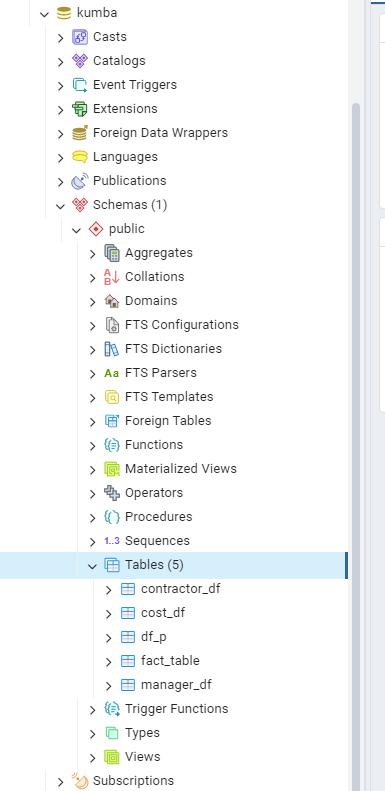